# Heart Disease Detection

In [55]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("darkgrid")
plt.style.use("classic")


In [56]:
#read data
data=pd.read_csv(r"C:\Users\sande\Downloads\mca project\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# data exploration 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [58]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
data.shape

(1025, 14)

# count presence and absence of heart disease

In [60]:
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [61]:
data.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=400, height=300
)


:Bars   [target]   (count)

# check messing values

In [62]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [64]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# count heart disease by sex

In [65]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))


Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [66]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [sex]   (count)
   .Bars.Count.II :Bars   [sex]   (count)

# heart disease by fbs

In [67]:

have_disease = data.loc[data['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [fbs]   (count)
   .Bars.Count.II :Bars   [fbs]   (count)

# heart disease by chest pain

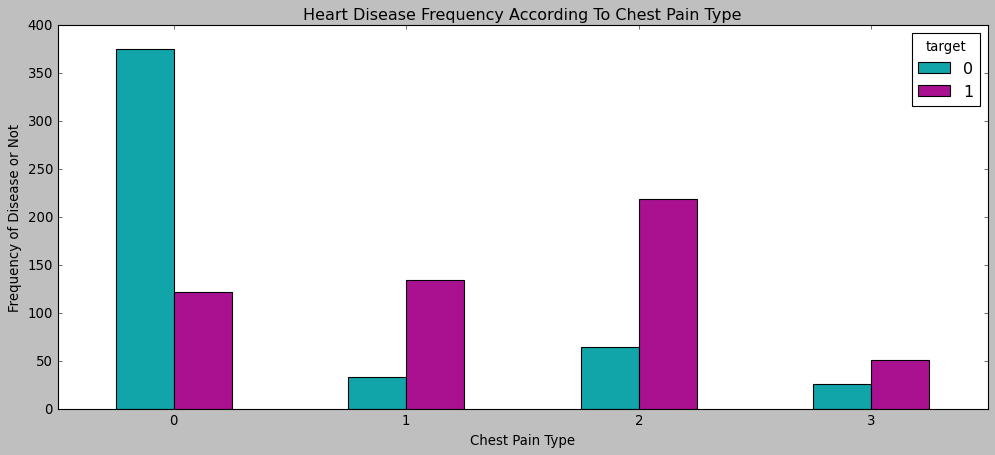

In [68]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# heart disease by age 

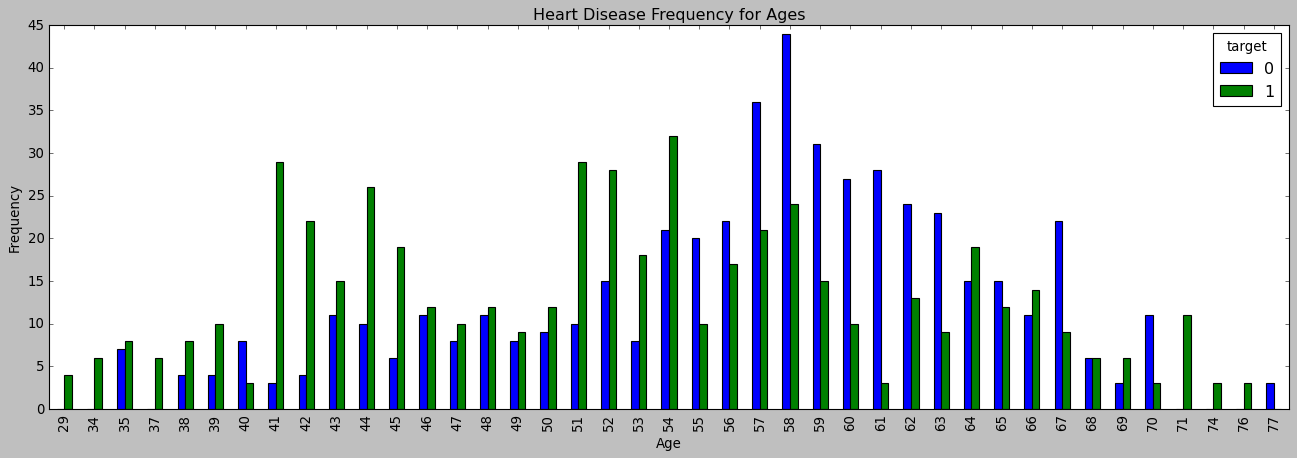

In [69]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

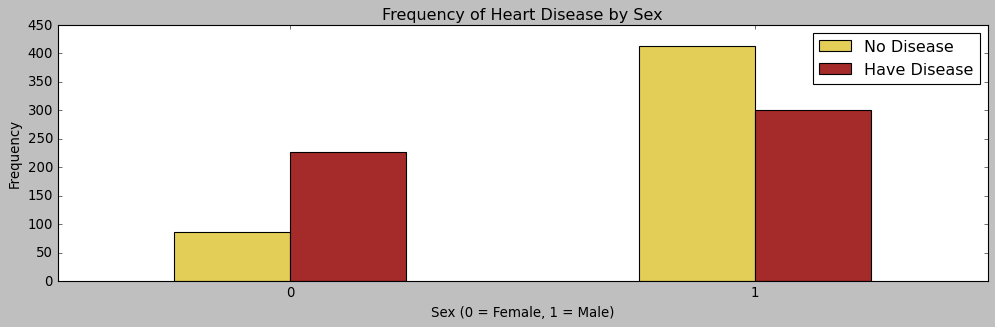

In [70]:
#calculate frequency of heart disease by sex
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,4),color=['#E3CF57', "#A52A2A" ])
plt.title('Frequency of Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

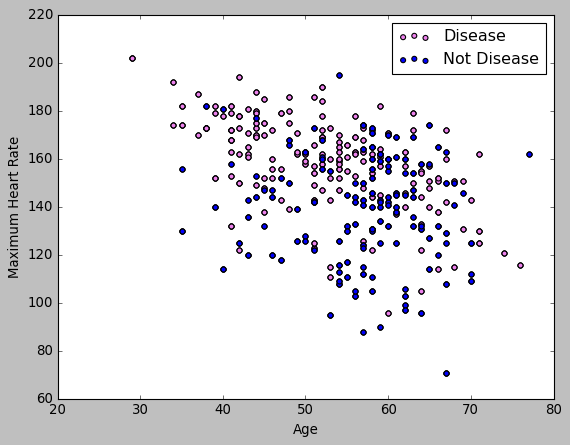

In [71]:
#calculate frequency of heart disease by Maximum heart rate
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="violet")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

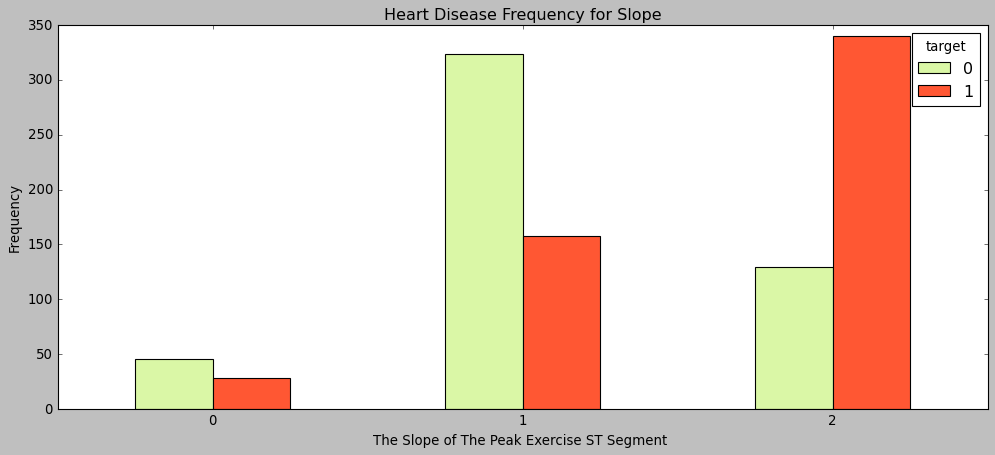

In [72]:
#calculate slope of ST segment 
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# draw histogram 

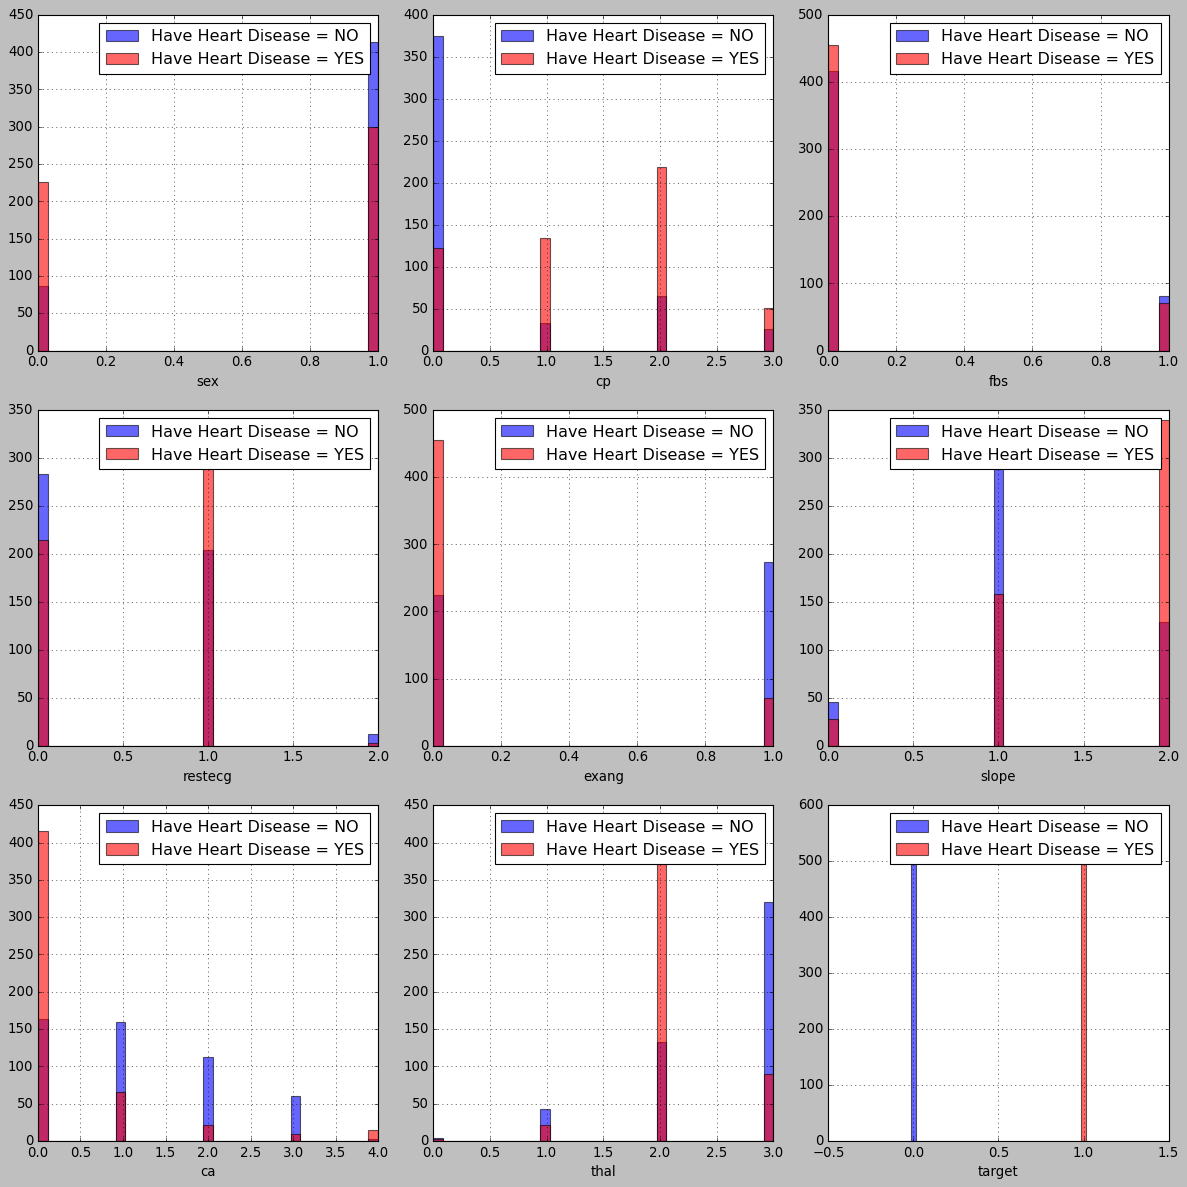

In [73]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.tight_layout()    
plt.show()

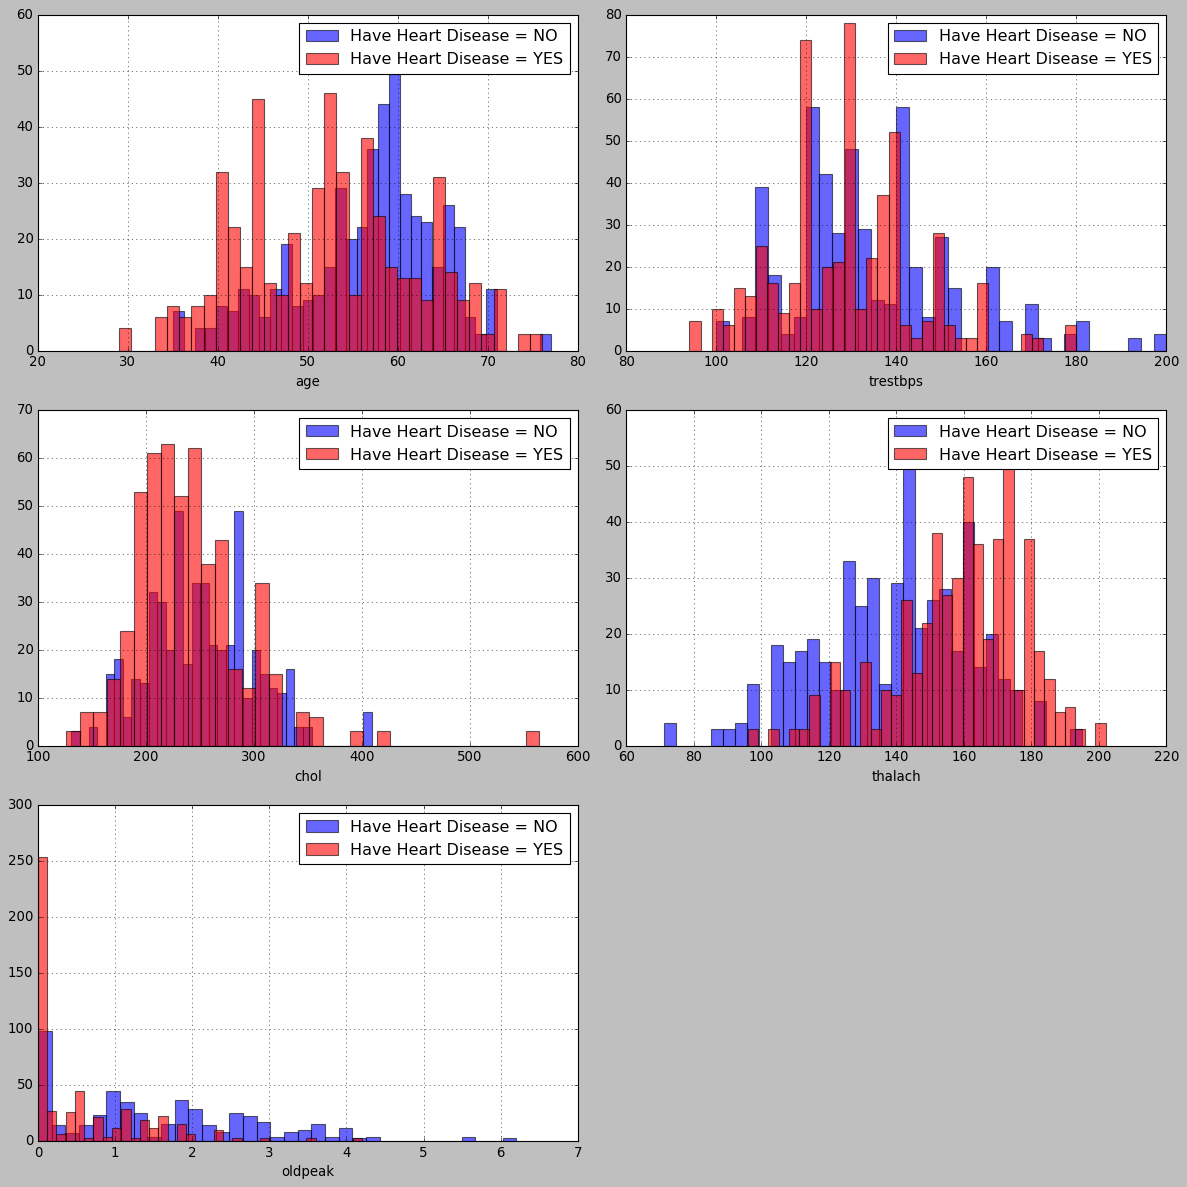

In [74]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP

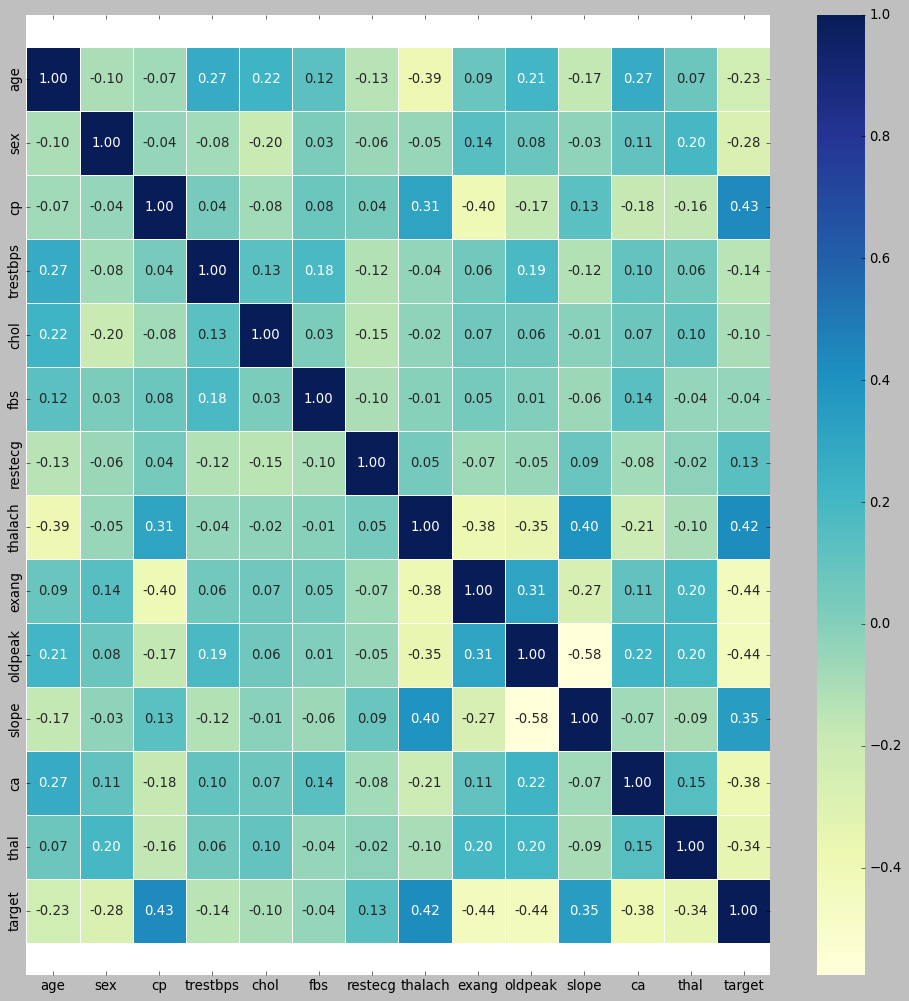

In [75]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

# creating dummy variables 

In [76]:
if 'target' in categorical_val:
    categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [77]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [78]:
print(data.columns)
print(dataset.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [79]:
# from sklearn.preprocessing import StandardScaler

# s_sc = StandardScaler()
# col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [80]:
# dataset.head()

# model building 

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [82]:
# Splitting the data set 
# from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying FSM methods

In [83]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Chi-Square requires positive values, so we scale the data for it
X_chi2 = MinMaxScaler().fit_transform(X)

# 1. ANOVA F-value
anova_selector = SelectKBest(score_func=f_classif, k=9)
X_anova = anova_selector.fit_transform(X, y)
anova_features = X.columns[anova_selector.get_support()]
print("✅ Top features by ANOVA:\n", list(anova_features))

# 2. Chi-Square
chi2_selector = SelectKBest(score_func=chi2, k=9)
X_chi2_selected = chi2_selector.fit_transform(X_chi2, y)
chi2_features = X.columns[chi2_selector.get_support()]
print("✅ Top features by Chi-Square:\n", list(chi2_features))

# 3. Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=9)
X_mi = mi_selector.fit_transform(X, y)
mi_features = X.columns[mi_selector.get_support()]
print("✅ Top features by Mutual Information:\n", list(mi_features))

# Optional: Final selection to use for modeling (based on ANOVA)
X_selected = X[anova_features]

✅ Top features by ANOVA:
 ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
✅ Top features by Chi-Square:
 ['sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
✅ Top features by Mutual Information:
 ['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [84]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
# model.fit(X_selected, y)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")

Original dataset shape: (717, 9), (717,)
Resampled dataset shape: (754, 9), (754,)


# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_resampled, y_resampled)

print_score(lr_clf, X_resampled, y_resampled, X_test, y_test, train=True)
print_score(lr_clf, X_resampled, y_resampled, X_test, y_test, train=False)


# Optional: check accuracy explictly
train_accuracy = accuracy_score(y_resampled, lr_clf.predict(X_resampled))
test_accuracy = accuracy_score(y_test, lr_clf.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Result:
Accuracy Score: 86.74%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894587    0.843672  0.867374    0.869130      0.869130
recall       0.832891    0.901857  0.867374    0.867374      0.867374
f1-score     0.862637    0.871795  0.867374    0.867216      0.867216
support    377.000000  377.000000  0.867374  754.000000    754.000000
_______________________________________________
Confusion Matrix: 
 [[314  63]
 [ 37 340]]

Test Result:
Accuracy Score: 83.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.879433    0.790419  0.831169    0.834926      0.836371
recall       0.779874    0.885906  0.831169    0.832890      0.831169
f1-score     0.826667    0.835443  0.831169    0.831055      0.830912
support    159.000000  149.000000  0.831169  308.000000    308.

In [88]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_resampled, lr_clf.predict(X_resampled)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.737401,83.116883


# K-Nearest Neighbour

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_resampled, y_resampled)

print_score(knn_clf, X_resampled, y_resampled, X_test, y_test, train=True)
print_score(knn_clf, X_resampled, y_resampled, X_test, y_test, train=False)


# Optional: check accuracy explictly
train_accuracy = accuracy_score(y_resampled, knn_clf.predict(X_resampled))
test_accuracy = accuracy_score(y_test, knn_clf.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Result:
Accuracy Score: 95.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.945312    0.962162  0.953581    0.953737      0.953737
recall       0.962865    0.944297  0.953581    0.953581      0.953581
f1-score     0.954008    0.953146  0.953581    0.953577      0.953577
support    377.000000  377.000000  0.953581  754.000000    754.000000
_______________________________________________
Confusion Matrix: 
 [[363  14]
 [ 21 356]]

Test Result:
Accuracy Score: 89.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.915584    0.883117  0.899351    0.899351      0.899878
recall       0.886792    0.912752  0.899351    0.899772      0.899351
f1-score     0.900958    0.897690  0.899351    0.899324      0.899377
support    159.000000  149.000000  0.899351  308.000000    308.

In [90]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_resampled, knn_clf.predict(X_resampled)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df=pd.concat([results_df,results_df_2],ignore_index=True)

results_df = results_df.drop_duplicates(subset=['Model'],keep='last')

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.737401,83.116883
1,K-nearest neighbors,95.358090,89.935065


# Support Vector Machine 

In [91]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_resampled, y_resampled)

print_score(svm_clf, X_resampled, y_resampled, X_test, y_test, train=True)
print_score(svm_clf, X_resampled, y_resampled, X_test, y_test, train=False)


# Optional: check accuracy explictly
train_accuracy = accuracy_score(y_resampled, svm_clf.predict(X_resampled))
test_accuracy = accuracy_score(y_test, svm_clf.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Result:
Accuracy Score: 92.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.939726    0.912596  0.925729    0.926161      0.926161
recall       0.909814    0.941645  0.925729    0.925729      0.925729
f1-score     0.924528    0.926893  0.925729    0.925711      0.925711
support    377.000000  377.000000  0.925729  754.000000    754.000000
_______________________________________________
Confusion Matrix: 
 [[343  34]
 [ 22 355]]

Test Result:
Accuracy Score: 89.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.944444    0.859756  0.899351    0.902100      0.903475
recall       0.855346    0.946309  0.899351    0.900827      0.899351
f1-score     0.897690    0.900958  0.899351    0.899324      0.899271
support    159.000000  149.000000  0.899351  308.000000    308.

In [92]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_resampled, svm_clf.predict(X_resampled)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df=pd.concat([results_df,results_df_2],ignore_index=True)

results_df = results_df.drop_duplicates(subset=['Model'],keep='last')

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.737401,83.116883
1,K-nearest neighbors,95.358090,89.935065
2,Support Vector Machine,92.572944,89.935065


# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_resampled, y_resampled)

print_score(tree_clf, X_resampled, y_resampled, X_test, y_test, train=True)
print_score(tree_clf, X_resampled, y_resampled, X_test, y_test, train=False)


# Optional: check accuracy explictly
train_accuracy = accuracy_score(y_resampled, tree_clf.predict(X_resampled))
test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    377.0  377.0       1.0      754.0         754.0
_______________________________________________
Confusion Matrix: 
 [[377   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946429    1.000000  0.970779    0.973214      0.972345
recall       1.000000    0.939597  0.970779    0.969799      0.970779
f1-score     0.972477    0.968858  0.970779    0.970668      0.970726
support    159.000000  149.000000  0.970779  308.000000    308.000000
_______________________________________________

In [94]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_resampled, tree_clf.predict(X_resampled)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df=pd.concat([results_df,results_df_2],ignore_index=True)

results_df = results_df.drop_duplicates(subset=['Model'],keep='last')

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.737401,83.116883
1,K-nearest neighbors,95.358090,89.935065
2,Support Vector Machine,92.572944,89.935065
3,Decision Tree Classifier,100.000000,97.077922


# Random Forest 

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_resampled, y_resampled)

print_score(rf_clf, X_resampled, y_resampled, X_test, y_test, train=True)
print_score(rf_clf, X_resampled, y_resampled, X_test, y_test, train=False)


# Optional: check accuracy explictly
train_accuracy = accuracy_score(y_resampled, rf_clf.predict(X_resampled))
test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    377.0  377.0       1.0      754.0         754.0
_______________________________________________
Confusion Matrix: 
 [[377   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.963636    1.000000  0.980519    0.981818      0.981228
recall       1.000000    0.959732  0.980519    0.979866      0.980519
f1-score     0.981481    0.979452  0.980519    0.980467      0.980500
support    159.000000  149.000000  0.980519  308.000000    308.000000
_______________________________________________

In [96]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_resampled, rf_clf.predict(X_resampled)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df=pd.concat([results_df,results_df_2],ignore_index=True)

results_df = results_df.drop_duplicates(subset=['Model'],keep='last')

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.737401,83.116883
1,K-nearest neighbors,95.358090,89.935065
2,Support Vector Machine,92.572944,89.935065
3,Decision Tree Classifier,100.000000,97.077922
4,Random Forest Classifier,100.000000,98.051948


In [97]:
import warnings
warnings.filterwarnings('ignore')

# XGBoost 

In [98]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb_clf.fit(X_resampled, y_resampled)

# Print the performance scores
print_score(xgb_clf, X_resampled, y_resampled, X_test, y_test, train=True)
print_score(xgb_clf, X_resampled, y_resampled, X_test, y_test, train=False)


# Optional: check accuracy explictly
train_accuracy = accuracy_score(y_resampled, xgb_clf.predict(X_resampled))
test_accuracy = accuracy_score(y_test, xgb_clf.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    377.0  377.0       1.0      754.0         754.0
_______________________________________________
Confusion Matrix: 
 [[377   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946429    1.000000  0.970779    0.973214      0.972345
recall       1.000000    0.939597  0.970779    0.969799      0.970779
f1-score     0.972477    0.968858  0.970779    0.970668      0.970726
support    159.000000  149.000000  0.970779  308.000000    308.000000
_______________________________________________

In [99]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_resampled, xgb_clf.predict(X_resampled)) * 100

results_df_2 = pd.DataFrame(data=[["XGBClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# if not ((results_df['Model'] == 'XGBClassifier').any()):
results_df=pd.concat([results_df,results_df_2],ignore_index=True)
    
results_df = results_df.drop_duplicates(subset=['Model'],keep='last')

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.737401,83.116883
1,K-nearest neighbors,95.358090,89.935065
2,Support Vector Machine,92.572944,89.935065
3,Decision Tree Classifier,100.000000,97.077922
4,Random Forest Classifier,100.000000,98.051948
5,XGBClassifier,100.000000,97.077922


# AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=1000, random_state=42)

# Fit the model
ada_clf.fit(X_resampled, y_resampled)

# Print the performance scores
print_score(ada_clf, X_resampled, y_resampled, X_test, y_test, train=True)
print_score(ada_clf, X_resampled, y_resampled, X_test, y_test, train=False)

# Optional: check accuracy explictly
train_accuracy = accuracy_score(y_resampled, ada_clf.predict(X_resampled))
test_accuracy = accuracy_score(y_test, ada_clf.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Result:
Accuracy Score: 98.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.978947    0.986631  0.982759    0.982789      0.982789
recall       0.986737    0.978780  0.982759    0.982759      0.982759
f1-score     0.982827    0.982690  0.982759    0.982758      0.982758
support    377.000000  377.000000  0.982759  754.000000    754.000000
_______________________________________________
Confusion Matrix: 
 [[372   5]
 [  8 369]]

Test Result:
Accuracy Score: 93.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.921687    0.957746  0.938312    0.939717      0.939131
recall       0.962264    0.912752  0.938312    0.937508      0.938312
f1-score     0.941538    0.934708  0.938312    0.938123      0.938234
support    159.000000  149.000000  0.938312  308.000000    308.

In [101]:
test_score = accuracy_score(y_test, ada_clf.predict(X_test)) * 100
train_score = accuracy_score(y_resampled, ada_clf.predict(X_resampled)) * 100

results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# if not ((results_df['Model'] == 'AdaBoostClassifier').any()):
results_df=pd.concat([results_df,results_df_2],ignore_index=True)

results_df = results_df.drop_duplicates(subset=['Model'],keep='last')
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.737401,83.116883
1,K-nearest neighbors,95.358090,89.935065
2,Support Vector Machine,92.572944,89.935065
3,Decision Tree Classifier,100.000000,97.077922
4,Random Forest Classifier,100.000000,98.051948
5,XGBClassifier,100.000000,97.077922
6,AdaBoostClassifier,98.275862,93.831169


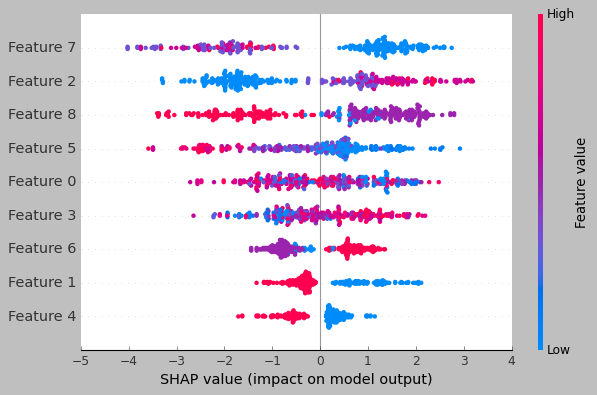

In [102]:
# SHAP for model interpretation (XGBoost Example)
import shap

explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Testing the Model

In [105]:
import numpy as np

# Example person data (replace with real values)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
person_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 1]])


# 63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1 - having disease
# 52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3  - having disease
# Use the same scaler or preprocessing as the training set if any (e.g., StandardScaler)
# person_data = scaler.transform(person_data)  # if used during training

# Predict using your model (e.g., XGBoost)
prediction = rf_clf.predict(person_data)

# Interpret prediction
if prediction[0] == 1:
    print("The person is likely to have heart disease.")
else:
    print("The person is unlikely to have heart disease.")

The person is unlikely to have heart disease.


In [106]:
from sklearn.ensemble import RandomForestClassifier  # or your model
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

# Load dataset
df = pd.read_csv("heart.csv")
X = df[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save model
with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(model, f)